<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,24.661995,0.049681,34.711676,34.670864,0.040812
1,0.0,1.0,74.586618,0.012591,84.599209,84.589584,0.009624
2,0.0,2.0,49.163639,-0.005296,59.158343,59.169611,-0.011268
3,0.0,3.0,83.139399,0.004577,93.143976,93.141354,0.002622
4,0.0,4.0,60.320667,-0.002188,70.318479,70.325320,-0.006841
...,...,...,...,...,...,...,...
19995,999.0,15.0,61.288090,0.008083,71.296173,71.292760,0.003412
19996,999.0,16.0,88.180198,0.005443,98.185641,98.180992,0.004649
19997,999.0,17.0,39.478942,0.005524,49.484466,49.486756,-0.002290
19998,999.0,18.0,90.262767,-0.011814,100.250953,100.263261,-0.012307


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    24.661995  0.049681   34.711676   34.670864  0.040812
      1.0    74.586618  0.012591   84.599209   84.589584  0.009624
      2.0    49.163639 -0.005296   59.158343   59.169611 -0.011268
      3.0    83.139399  0.004577   93.143976   93.141354  0.002622
      4.0    60.320667 -0.002188   70.318479   70.325320 -0.006841
...                ...       ...         ...         ...       ...
999.0 15.0   61.288090  0.008083   71.296173   71.292760  0.003412
      16.0   88.180198  0.005443   98.185641   98.180992  0.004649
      17.0   39.478942  0.005524   49.484466   49.486756 -0.002290
      18.0   90.262767 -0.011814  100.250953  100.263261 -0.012307
      19.0   87.192013 -0.013105   97.178907   97.192949 -0.014042

[20000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    24.661995  0.049681   34.711676   34.670864  0.040812
      1.0    74.586618  0.012591   84.599209   84.589584  0.009624
      2.0    49.163639 -0.005296   59.158343   59.169611 -0.011268
      3.0    83.139399  0.004577   93.143976   93.141354  0.002622
      4.0    60.320667 -0.002188   70.318479   70.325320 -0.006841
...                ...       ...         ...         ...       ...
999.0 15.0   61.288090  0.008083   71.296173   71.292760  0.003412
      16.0   88.180198  0.005443   98.185641   98.180992  0.004649
      17.0   39.478942  0.005524   49.484466   49.486756 -0.002290
      18.0   90.262767 -0.011814  100.250953  100.263261 -0.012307
      19.0   87.192013 -0.013105   97.178907   97.192949 -0.014042

[20000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,24.661995,0.049681,34.711676,34.670864,0.040812
1,0.0,1.0,74.586618,0.012591,84.599209,84.589584,0.009624
2,0.0,2.0,49.163639,-0.005296,59.158343,59.169611,-0.011268
3,0.0,3.0,83.139399,0.004577,93.143976,93.141354,0.002622
4,0.0,4.0,60.320667,-0.002188,70.318479,70.325320,-0.006841
...,...,...,...,...,...,...,...
19995,999.0,15.0,61.288090,0.008083,71.296173,71.292760,0.003412
19996,999.0,16.0,88.180198,0.005443,98.185641,98.180992,0.004649
19997,999.0,17.0,39.478942,0.005524,49.484466,49.486756,-0.002290
19998,999.0,18.0,90.262767,-0.011814,100.250953,100.263261,-0.012307


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    24.661995  0.049681   34.711676   34.670864  0.040812
      1.0    74.586618  0.012591   84.599209   84.589584  0.009624
      2.0    49.163639 -0.005296   59.158343   59.169611 -0.011268
      3.0    83.139399  0.004577   93.143976   93.141354  0.002622
      4.0    60.320667 -0.002188   70.318479   70.325320 -0.006841
...                ...       ...         ...         ...       ...
999.0 15.0   61.288090  0.008083   71.296173   71.292760  0.003412
      16.0   88.180198  0.005443   98.185641   98.180992  0.004649
      17.0   39.478942  0.005524   49.484466   49.486756 -0.002290
      18.0   90.262767 -0.011814  100.250953  100.263261 -0.012307
      19.0   87.192013 -0.013105   97.178907   97.192949 -0.014042

[20000 rows x 5 columns]

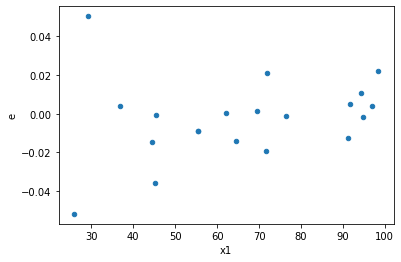

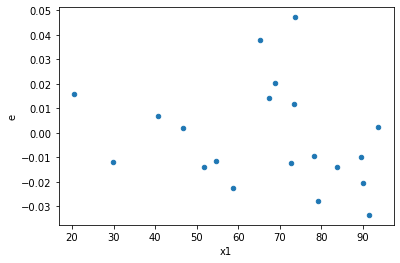

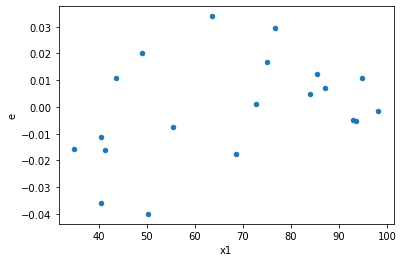

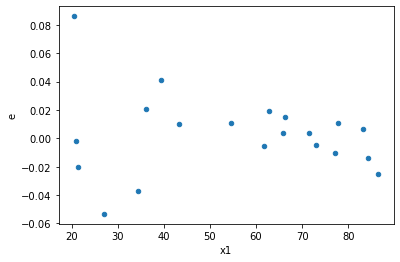

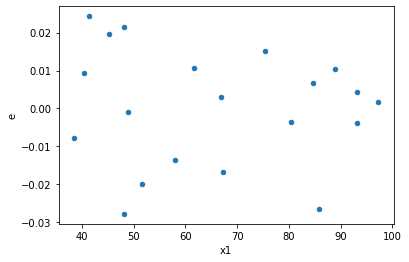

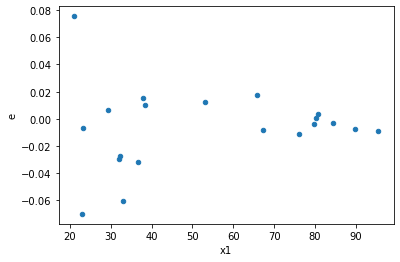

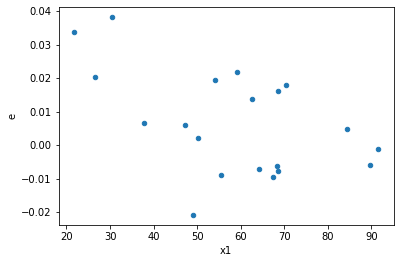

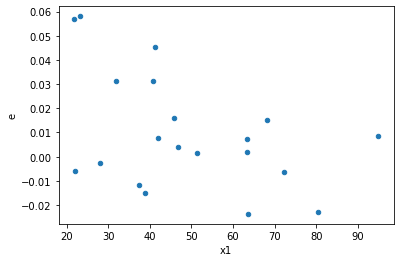

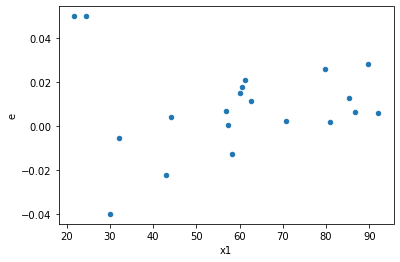

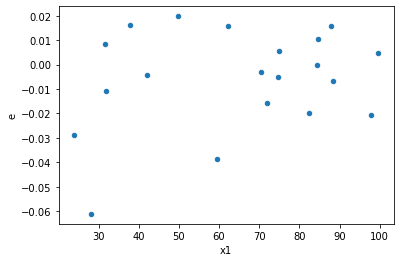

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,6.0,12.0,0.00018409458703659456,0.007108211727654968,3.068243117276576e-05,0.0005923509773045806,19.30586836385903,3.240278917959749e-05,0.9999837986054102,1.6201394589798745e-05,Reject005=0 : Heteroscedasticity
3.0,6.0,12.0,0.0002147413001394634,0.010118546194999424,3.5790216689910564e-05,0.0008432121829166187,23.559851291828704,1.1188282764029722e-05,0.999994405858618,5.594141382014861e-06,Reject005=0 : Heteroscedasticity
5.0,5.0,13.0,0.00012786100065386406,0.005126824844148055,2.5572200130772813e-05,0.00039437114185754266,15.42186983680643,9.087752727254816e-05,0.9999545612363637,4.543876363627408e-05,Reject005=0 : Heteroscedasticity
10.0,9.0,9.0,0.001455549097083654,0.006456737911190303,0.00016172767745373934,0.0007174153234655892,4.4359464920331835,0.03693445705156484,0.9815327714742176,0.01846722852578242,Reject005=0 : Heteroscedasticity
17.0,6.0,12.0,0.0014165990466638602,0.006844765104787464,0.00023609984111064338,0.000570397092065622,2.4159147646283974,0.18242391653126955,0.9087880417343652,0.09121195826563477,Reject005=1 : Homoscedasticity
20.0,9.0,9.0,0.0005024808390332451,0.008736423252657695,5.583120433702724e-05,0.0009707136947397439,17.38657989320798,0.00023053984317589205,0.999884730078412,0.00011526992158794602,Reject005=0 : Heteroscedasticity
24.0,8.0,10.0,0.0005239193065179616,0.0049076310175880196,6.54899133147452e-05,0.000490763101758802,7.493720436003472,0.00457829858805936,0.9977108507059703,0.00228914929402968,Reject005=0 : Heteroscedasticity
26.0,9.0,9.0,0.003146429006624751,0.01589209798569064,0.00034960322295830566,0.001765788665076738,5.050836345657286,0.024247373421796503,0.9878763132891017,0.012123686710898252,Reject005=0 : Heteroscedasticity
27.0,7.0,11.0,0.0005970543619556148,0.003446818847845212,8.529348027937353e-05,0.00031334716798592834,3.6737528702027284,0.053896073160664804,0.9730519634196676,0.026948036580332402,Reject005=1 : Homoscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,12.0,0.00018409458703659456,0.007108211727654968,3.068243117276576e-05,0.0005923509773045806,19.30586836385903,3.240278917959749e-05,Reject005=0 : Heteroscedasticity
1.0,9.0,9.0,0.015030518352272343,0.0011043377118713014,0.001670057594696927,0.0001227041902079224,0.07347302907250339,0.0006218667695615854,Reject005=0 : Heteroscedasticity
2.0,13.0,5.0,0.01007185074404128,0.0003643865748475939,0.0007747577495416369,7.287731496951878e-05,0.09406464796594102,0.0006255444464652296,Reject005=0 : Heteroscedasticity
3.0,6.0,12.0,0.0002147413001394634,0.010118546194999424,3.5790216689910564e-05,0.0008432121829166187,23.559851291828704,1.1188282764029722e-05,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,0.00308290788230398,0.0009366399630667173,0.0003425453202559978,0.00010407110700741304,0.3038170450836594,0.09067303994390015,Reject005=1 : Homoscedasticity
5.0,5.0,13.0,0.00012786100065386406,0.005126824844148055,2.5572200130772813e-05,0.00039437114185754266,15.42186983680643,9.087752727254816e-05,Reject005=0 : Heteroscedasticity
6.0,8.0,10.0,0.0052364749198764455,0.0018594473445471646,0.0006545593649845557,0.00018594473445471645,0.2840761959904184,0.0873581487577023,Reject005=1 : Homoscedasticity
7.0,10.0,8.0,0.0012436493238104347,0.0005040914401721254,0.00012436493238104348,6.301143002151568e-05,0.5066655753766187,0.3105898815527362,Reject005=1 : Homoscedasticity
8.0,7.0,11.0,0.008097975477083033,0.000979047915702857,0.0011568536395832904,8.900435597298701e-05,0.07693657428008543,0.0024649881536692,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    528
Reject005=1 : Homoscedasticity      472
Name: Result_test, dtype: int64